<a href="https://colab.research.google.com/github/wakii/ds_parrot/blob/master/Parrot_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **MNIST - digit recognizer**
- Load Data
- Preprocessing
- Modeling


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.2.0-rc3


#### Load Data
Mnist original dataset

In [0]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("x_train shape : ", x_train.shape)
print("y_train shape : ", y_train.shape)
print("x_test shape : ", x_test.shape)
print("y_test shape : ", y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape :  (60000, 28, 28)
y_train shape :  (60000,)
x_test shape :  (10000, 28, 28)
y_test shape :  (10000,)


In [4]:
y_train[0]

5

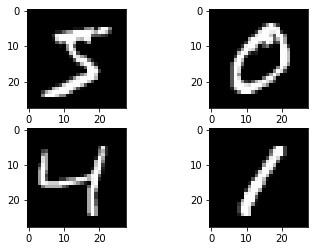

In [5]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

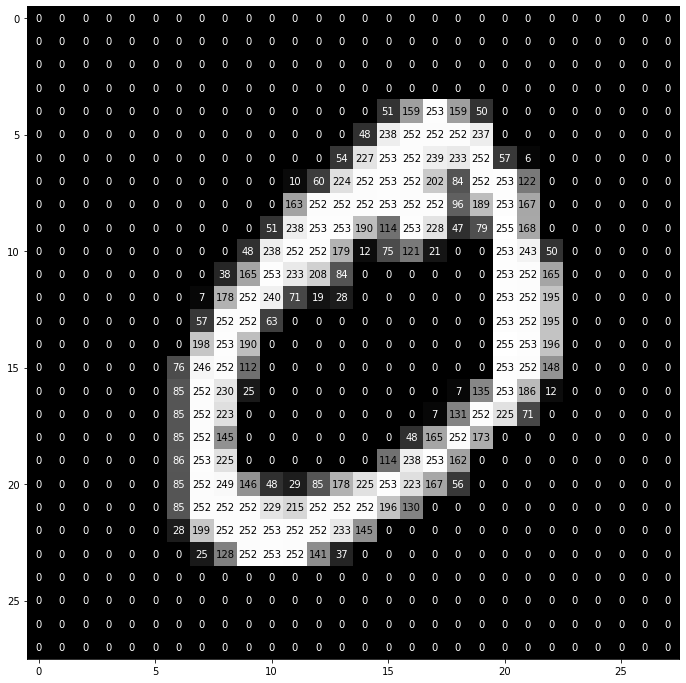

In [6]:
# visualize
def visualize_input(img, ax):
    ax.imshow(img, cmap = "gray")
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y], 2)), xy = (y, x),
                                  horizontalalignment = 'center',
                                  verticalalignment = 'center',
                                  color = 'white' if img[x][y] < thresh else 'black')
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111)
visualize_input(x_train[1].reshape(28, 28), ax)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


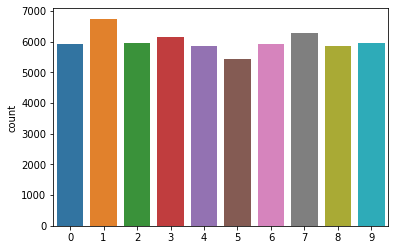

In [7]:
import seaborn as sns
g = sns.countplot(y_train)

#### Preprocessing
- normalize, one hot encoding

In [0]:
# Normalize
x_train = x_train/255
x_test = x_test/255

In [0]:
# reshape --> 1D(784)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1]*x_train.shape[2])).astype('float32')
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1]*x_test.shape[2])).astype('float32')

In [10]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# one hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = 10

In [12]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#### Baseline Model(fully-connected)

In [13]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(784, input_dim = 784, kernel_initializer = 'normal',
                         activation = 'relu'))
model.add(tf.keras.layers.Dense(num_classes, kernel_initializer='normal',
                                activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


### **학습**
- model.fit으로도 학습이 가능합니다. 다만 이후에 학습 과정을 시각화하기를 원하면 history를 저장해주시면 됩니다.
- 일반화 정도 확인을 위해 validation data를 지정해줍니다. 이전에 나뉘어져 있는 경우 validation_data = (valid_x, valid_y) 이런식으로 넣어주면 되지만 train set만 보유하고 있는 경우 validation_split = (비율)로 validation data를 구성할 수 있습니다.

In [0]:
# model.fit(x_train, y_train, validation_data = (valid_x, valid_y)

In [0]:
# from sklearn.model_selection import train_test_split

In [0]:
# hist = model.fit(x_train, y_train, validation_split=0.2, epochs = 10, batch_size = 128, verbose = 1)

In [0]:
def acc_loss_plot(hist):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')

    acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
    acc_ax.set_ylabel('accuracy')
    acc_ax.legend(loc='upper right')

    plt.show()

In [18]:
score = model.evaluate(x_test, y_test, verbose = 0)
print("Baseline Error: %.2f%%" % (100-score[1]*100))
print("Baseline Accuracy: %.2f%%" % (score[1]*100))

Baseline Error: 89.60%
Baseline Accuracy: 10.40%


#### Simple CNN

In [19]:
tf.keras.backend.clear_session()
model_1 = tf.keras.models.Sequential()
model_1.add(tf.keras.layers.Conv2D(32, (5, 5), input_shape = (28, 28, 1), activation = 'relu'))
model_1.add(tf.keras.layers.MaxPool2D())
model_1.add(tf.keras.layers.Dropout(0.2))
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(128, activation = 'relu'))
model_1.add(tf.keras.layers.Dense(num_classes, activation = 'softmax'))

model_1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
__________________________________________________

In [20]:
tf.keras.backend.clear_session()
model_2 = tf.keras.models.Sequential()

# Layer1
model_2.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), strides=(1,1), input_shape = (28, 28, 1), activation = 'relu'))
  # Row,Col Size : (28-3)/1 + 1 == 26
  # Activation Map Shape(26,26,32)
model_2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
  # Row, Col Size : (13,13,32)

# Layer2
model_2.add(tf.keras.layers.Conv2D(64, kernel_size=(2, 2), input_shape = (13, 13, 32), activation = 'relu'))
  # Row,Col Size : (13-2)/1 + 1 == 12
  # Activation Map Shape : (12,12,64)
model_2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
  # Row,Col Size : (6,6,64)

# Layer3
model_2.add(tf.keras.layers.Conv2D(128, kernel_size=(2, 2), input_shape = (6, 6, 64), activation = 'relu'))
  # Row,Col Size : (6-2)/1 + 1 == 5
  # Activation Map Shape : (5,5,128)

model_2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
  # Row, Col Size : (2,2,128)

# # Layer4
# model_2.add(tf.keras.layers.Conv2D(256, kernel_size=(2, 2), input_shape = (6, 6, 128), activation = 'relu'))
#   # Row,Col Size : (6-2)/1 + 1 == 12
#   # Activation Map Shape : (12,12,128)
# model_2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#   # Row, Col Size : (6,6,128)

model_2.add(tf.keras.layers.Dropout(0.2))
model_2.add(tf.keras.layers.Flatten())
model_2.add(tf.keras.layers.Dense(128, activation = 'relu'))
model_2.add(tf.keras.layers.Dense(num_classes, activation = 'softmax'))

model_2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 128)         32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 128)         0

In [30]:
tf.keras.backend.clear_session()
model_3 = tf.keras.models.Sequential()

# Layer1
model_3.add(tf.keras.layers.Conv2D(32, kernel_size=(5, 5), strides=(1,1), input_shape = (28, 28, 1), activation = 'relu'))
model_3.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model_3.add(tf.keras.layers.Dropout(0.3))
  # Row, Col Size : (12,12,32)

# Layer2
model_3.add(tf.keras.layers.Conv2D(64, kernel_size=(4, 4), strides=(1,1), input_shape = (12, 12, 32), activation = 'relu'))
model_3.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
  # Row, Col Size : (4,4,64)
model_3.add(tf.keras.layers.Dropout(0.3))

# Layer3
model_3.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), strides=(1,1), input_shape = (4, 4, 64), activation = 'relu'))
model_3.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model_3.add(tf.keras.layers.Dropout(0.2))


model_3.add(tf.keras.layers.Flatten())
model_3.add(tf.keras.layers.Dense(128, activation = 'relu'))
model_3.add(tf.keras.layers.Dense(num_classes, activation = 'softmax'))

model_3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model_3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         7

In [33]:
tf.keras.backend.clear_session()
model_4 = tf.keras.models.Sequential()

# Layer1
model_4.add(tf.keras.layers.Conv2D(32, kernel_size=(5, 5), strides=(1,1), input_shape = (28, 28, 1), activation = 'relu'))
model_4.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model_4.add(tf.keras.layers.Dropout(0.3))
  # Row, Col Size : (12,12,32)

# Layer2
model_4.add(tf.keras.layers.Conv2D(64, kernel_size=(5, 5), strides=(1,1), input_shape = (12, 12, 32), activation = 'relu'))
model_4.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
  # Row, Col Size : (4,4,64)
model_4.add(tf.keras.layers.Dropout(0.3))

# Layer3
model_4.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), strides=(1,1), input_shape = (4, 4, 64), activation = 'relu'))
model_4.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model_4.add(tf.keras.layers.Dropout(0.2))


model_4.add(tf.keras.layers.Flatten())
model_4.add(tf.keras.layers.Dense(128, activation = 'relu'))
model_4.add(tf.keras.layers.Dense(num_classes, activation = 'softmax'))

model_4.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model_4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         7

In [0]:
??tf.keras.layers.Conv2D

CNN은 3D(x, y, n_ch)를 입력으로 받기 때문에 앞서 784로 펴준 train data를 28x28로 reshape해줍니다. 채널도 1로 설정하여 데이터셋을 4D로 만들어줍니다.

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [0]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
hist1 = model_1.fit(x_train, y_train, validation_split = 0.2, epochs = 15, batch_size = 128)

Epoch 1/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0108 - accuracy: 0.9963 - val_loss: 0.0475 - val_accuracy: 0.9883
Epoch 2/15
283/375 [=====================>........] - ETA: 0s - loss: 0.0093 - accuracy: 0.9968

KeyboardInterrupt: ignored

In [0]:
hist2 = model_2.fit(x_train, y_train, validation_split = 0.2, epochs = 3, batch_size=128)

Epoch 1/3
375/375 [==============================] - 4s 10ms/step - loss: 0.0085 - accuracy: 0.9971 - val_loss: 0.0599 - val_accuracy: 0.9868
Epoch 2/3
375/375 [==============================] - 4s 9ms/step - loss: 0.0091 - accuracy: 0.9966 - val_loss: 0.0413 - val_accuracy: 0.9908
Epoch 3/3
375/375 [==============================] - 4s 9ms/step - loss: 0.0087 - accuracy: 0.9971 - val_loss: 0.0472 - val_accuracy: 0.9904


In [25]:
hist3 = model_3.fit(x_train, y_train, validation_split = 0.2, epochs = 25, batch_size=128)

Epoch 1/25
375/375 [==============================] - 3s 7ms/step - loss: 0.4495 - accuracy: 0.8522 - val_loss: 0.0907 - val_accuracy: 0.9742
Epoch 2/25
375/375 [==============================] - 3s 7ms/step - loss: 0.1194 - accuracy: 0.9631 - val_loss: 0.0570 - val_accuracy: 0.9826
Epoch 3/25
375/375 [==============================] - 2s 7ms/step - loss: 0.0831 - accuracy: 0.9742 - val_loss: 0.0461 - val_accuracy: 0.9871
Epoch 4/25
375/375 [==============================] - 2s 7ms/step - loss: 0.0664 - accuracy: 0.9801 - val_loss: 0.0401 - val_accuracy: 0.9889
Epoch 5/25
375/375 [==============================] - 3s 7ms/step - loss: 0.0591 - accuracy: 0.9812 - val_loss: 0.0359 - val_accuracy: 0.9912
Epoch 6/25
375/375 [==============================] - 2s 7ms/step - loss: 0.0518 - accuracy: 0.9841 - val_loss: 0.0365 - val_accuracy: 0.9895
Epoch 7/25
375/375 [==============================] - 3s 7ms/step - loss: 0.0495 - accuracy: 0.9849 - val_loss: 0.0325 - val_accuracy: 0.9902
Epoch 

In [34]:
hist4 = model_4.fit(x_train, y_train, validation_split = 0.2, epochs = 30, batch_size=128)

Epoch 1/30
375/375 [==============================] - 3s 7ms/step - loss: 0.4209 - accuracy: 0.8645 - val_loss: 0.0830 - val_accuracy: 0.9752
Epoch 2/30
375/375 [==============================] - 2s 7ms/step - loss: 0.1081 - accuracy: 0.9667 - val_loss: 0.0527 - val_accuracy: 0.9841
Epoch 3/30
375/375 [==============================] - 2s 7ms/step - loss: 0.0759 - accuracy: 0.9765 - val_loss: 0.0420 - val_accuracy: 0.9876
Epoch 4/30
375/375 [==============================] - 2s 7ms/step - loss: 0.0610 - accuracy: 0.9814 - val_loss: 0.0360 - val_accuracy: 0.9897
Epoch 5/30
375/375 [==============================] - 2s 6ms/step - loss: 0.0509 - accuracy: 0.9835 - val_loss: 0.0320 - val_accuracy: 0.9912
Epoch 6/30
375/375 [==============================] - 2s 7ms/step - loss: 0.0465 - accuracy: 0.9861 - val_loss: 0.0314 - val_accuracy: 0.9915
Epoch 7/30
375/375 [==============================] - 2s 7ms/step - loss: 0.0394 - accuracy: 0.9875 - val_loss: 0.0312 - val_accuracy: 0.9918
Epoch 

In [0]:
score_1 = model_1.evaluate(x_test, y_test, verbose = 0)
print("Simple CNN Error: %.2f%%" % (100-score_1[1]*100))
print("Simple CNN Accuracy: %.2f%%" % (score_1[1]*100))

Simple CNN Error: 1.09%
Simple CNN Accuracy: 98.91%


In [0]:
score_2 = model_2.evaluate(x_test, y_test, verbose = 1)
print("Modified CNN Error: %.2f%%" % (100-score_2[1]*100))
print("Modified CNN Accuracy: %.2f%%" % (score_2[1]*100))

313/313 [==============================] - 1s 4ms/step - loss: 0.0380 - accuracy: 0.9914
Modified CNN Error: 0.86%
Modified CNN Accuracy: 99.14%


In [26]:
score_3 = model_3.evaluate(x_test, y_test, verbose = 1)
print("Modified CNN Error: %.2f%%" % (100-score_3[1]*100))
print("Modified CNN Accuracy: %.2f%%" % (score_3[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.0215 - accuracy: 0.9945
Modified CNN Error: 0.55%
Modified CNN Accuracy: 99.45%


In [35]:
score_4 = model_4.evaluate(x_test, y_test, verbose = 1)
print("Modified CNN Error: %.2f%%" % (100-score_4[1]*100))
print("Modified CNN Accuracy: %.2f%%" % (score_4[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.0180 - accuracy: 0.9956
Modified CNN Error: 0.44%
Modified CNN Accuracy: 99.56%


Baseline fitting


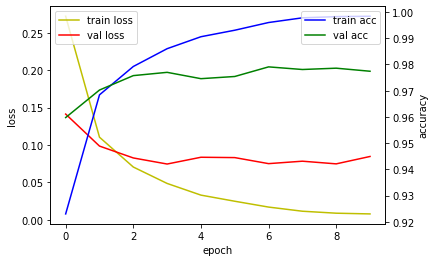

In [0]:
print("Baseline fitting")
acc_loss_plot(hist)

Simple CNN fitting


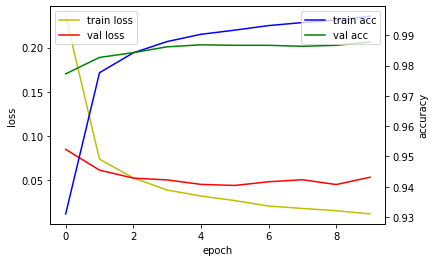

In [0]:
print("Simple CNN fitting")
acc_loss_plot(hist1)

Model2 CNN fitting


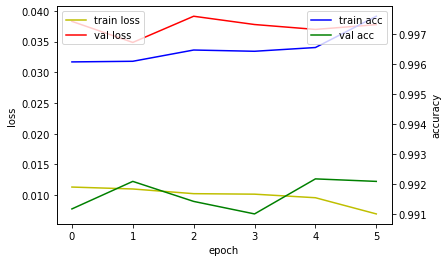

In [0]:
print("Model2 CNN fitting")
acc_loss_plot(hist2)

Model3 CNN fitting


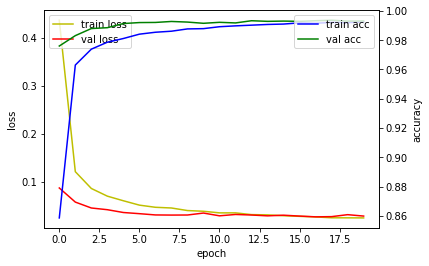

In [0]:
print("Model3 CNN fitting")
acc_loss_plot(hist3)

Model3 CNN fitting


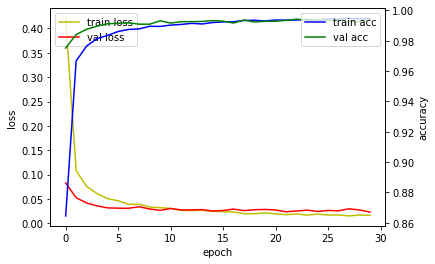

In [36]:
print("Model3 CNN fitting")
acc_loss_plot(hist4)